In [1]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, DoubleType, StringType
from pyspark.sql.functions import isnull, isnan, sum, count, col, when, to_date, unix_timestamp

In [2]:
spark = SparkSession.builder.appName("movie_metedata").getOrCreate()

In [3]:
connection_config = {"connect":"mongodb://localhost:27017", "database" : "IMDB", "collection" : "movie_metadata"}

class Mongo:
    def __init__(self, connection_string, database, collection):
        self.client = pymongo.MongoClient(connection_string)
        self.db = self.client[database]
        self.collection = self.db[collection]
        
    def getData(self):
        rows = self.collection.find()
        return rows
    
db = Mongo(connection_config["connect"], connection_config["database"], connection_config["collection"])

#getting data
data = db.getData()

In [4]:
schema = StructType(
[
    StructField("color", StringType(), True),
    StructField("director_name", StringType(), True),
    StructField("num_critic_for_reviews", StringType(), True),
    StructField("duration", StringType(), True),
    StructField("director_facebook_likes", StringType(), True),
    StructField("actor_3_facebook_likes", StringType(), True),
    StructField("actor_2_name", StringType(), True),
    StructField("actor_1_facebook_likes", StringType(), True),
    StructField("gross", StringType(), True),
    StructField("genres", StringType(), True),
    StructField("actor_1_name", StringType(), True),
    StructField("movie_title", StringType(), True),
    StructField("num_voted_users", StringType(), True),
    StructField("cast_total_facebook_likes", StringType(), True),
    StructField("actor_3_name", StringType(), True),
    StructField("facenumber_in_poster", StringType(), True),
    StructField("plot_keywords", StringType(), True),
    StructField("movie_imdb_link", StringType(), True),
    StructField("num_user_for_reviews", StringType(), True),
    StructField("language", StringType(), True),
    StructField("country", StringType(), True),
    StructField("content_rating", StringType(), True),
    StructField("budget", StringType(), True),
    StructField("title_year", StringType(), True),
    StructField("actor_2_facebook_likes", StringType(), True),
    StructField("imdb_score", StringType(), True),
    StructField("aspect_ratio", StringType(), True),
    StructField("movie_facebook_likes", StringType(), True),
    
    
])

In [5]:
dataframe = spark.createDataFrame(data, schema)
dataframe.printSchema()

root
 |-- color: string (nullable = true)
 |-- director_name: string (nullable = true)
 |-- num_critic_for_reviews: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- director_facebook_likes: string (nullable = true)
 |-- actor_3_facebook_likes: string (nullable = true)
 |-- actor_2_name: string (nullable = true)
 |-- actor_1_facebook_likes: string (nullable = true)
 |-- gross: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- actor_1_name: string (nullable = true)
 |-- movie_title: string (nullable = true)
 |-- num_voted_users: string (nullable = true)
 |-- cast_total_facebook_likes: string (nullable = true)
 |-- actor_3_name: string (nullable = true)
 |-- facenumber_in_poster: string (nullable = true)
 |-- plot_keywords: string (nullable = true)
 |-- movie_imdb_link: string (nullable = true)
 |-- num_user_for_reviews: string (nullable = true)
 |-- language: string (nullable = true)
 |-- country: string (nullable = true)
 |-- content_rating: string

In [6]:
dataframe.columns

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [7]:
#new_dataframe = dataframe.select(["director_name", "movie_title", "title_year"])
#new_dataframe.show()

In [8]:
data = db.getData()
df = pd.DataFrame(list(data))
df.head()

,_id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,645e8cc0eedcb5092c686234,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,645e8cc0eedcb5092c686235,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,645e8cc0eedcb5092c686236,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,645e8cc0eedcb5092c686237,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,645e8cc0eedcb5092c686238,NaN,Doug Walker,NaN,NaN,131,NaN,Rob Walker,131,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12,7.1,NaN,0


In [9]:
# removing the _id given by mongodb
df = df.drop(["_id"], axis="columns")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131,NaN,Rob Walker,131,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12,7.1,NaN,0


In [10]:
#getting the dimensions of the dataframe
df.shape

(5043, 27)

## 1. Understanding Data

The dataset is related to movies which contains 5000 rows of data. this dataset contains multiple columns for which is common for getting a proper information about a movie like director_name, budget, gross, movie_title, imdb_score, etc. there are also other column that provide additional insight about the movie. This helps in finding the correlation between the multiple column that affects the performance of the movie

In [11]:
df.columns 

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [12]:

print("Total Columns {}".format(len(df.columns)))

Total Columns 27


### Column Description

There are atotal of 27 column in this dataset. As all the columns are not needed for the analysis so, some of the column are going to be dropped and specific column are to be used. A brief description is given below:

- **color** Refers to the color of the film or movie.
- **director_name** Refers to the name of the director who directed the movie.
- **num_critic_for_reviews** Refers to the number of critical reviews the movie has received.
- **duration**  Refers to the length of the movie in minutes.
- **director_facebook_likes** Refers to the number of Facebook likes the director has.
- **actor_3_facebook_likes** Refers to the number of Facebook likes the third actor in the movie has.
- **actor_2_name** Refers to the name of the second actor in the movie.
- **actor_1_facebook_likes** Refers to the number of Facebook likes the first actor in the movie has.
- **gross** Refers to the total box office gross revenue of the movie.
- **genres** Refers to the category or genre of the movie (e.g., action, comedy, drama).
- **actor_1_name** Refers to the name of the first actor in the movie.
- **movie_title** Refers to the title of the movie.
- **num_voted_users** Refers to the number of users who have voted for the movie on IMDb.
- **cast_total_facebook_likes** Refers to the total number of Facebook likes for all the actors in the movie.
- **actor_3_name** Refers to the name of the third actor in the movie.
- **movie facebook like** Refers to the number the number of facebook likw a movie has
- **plot_keywords** Refers to the keywords used to describe the plot or storyline of the movie.
- **movie_imdb_link** Refers to the URL of the movie on IMDb.
- **num_user_for_reviews** Refers to the number of user reviews the movie has received on IMDb.
- **language**  Refers to the language in which the movie is produced.
- **country** Refers to the country where the movie was produced.
- **content_rating** Refers to the rating of the movie based on its content (e.g., G, PG-13, R).
- **budget** Refers to the budget of the movie.
- **title_year** Refers to the year in which the movie was released.
- **actor_2_facebook_likes** Refers to the number of Facebook likes the second actor in the movie has.
- **imdb_score** Refers to the IMDb user rating of the movie.
- **aspect_ratio** Refers to the ratio of the width to the height of the movie's aspect ratio.


In [13]:
df.dtypes

color                        object
director_name                object
num_critic_for_reviews       object
duration                     object
director_facebook_likes      object
actor_3_facebook_likes       object
actor_2_name                 object
actor_1_facebook_likes       object
gross                        object
genres                       object
actor_1_name                 object
movie_title                  object
num_voted_users              object
cast_total_facebook_likes    object
actor_3_name                 object
plot_keywords                object
movie_imdb_link              object
num_user_for_reviews         object
language                     object
country                      object
content_rating               object
budget                       object
title_year                   object
actor_2_facebook_likes       object
imdb_score                   object
aspect_ratio                 object
movie_facebook_likes         object
dtype: object


The dataset has only one type of data which is object

In [14]:
# checking for null values in the dataframe
df.isna().sum() + df.eq('NULL').sum() + df.eq('').sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

### 2.Cleaning Data

In [16]:
# creating a copy of the dataframe
dataframe = df.copy()
# replacing the NULL string and other empty string values with NaN
dataframe = dataframe.replace(['NULL', '', 'Nan'], np.nan)
# dropping the columns
dataframe = dataframe.drop(["color", "plot_keywords", "movie_imdb_link"], axis=1)
# displaying the first few rows of the modified dataframe
dataframe.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,Johnny Depp,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,Christoph Waltz,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,Tom Hardy,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131,NaN,Rob Walker,131,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12,7.1,NaN,0


In [17]:
# getting all the columns from the dataset where the garbage value count > 0
cols = [col for col in dataframe.columns if col not in ["director_name", "actor_1_name","actor_3_name","actor_2_name"] and dataframe[col].isna().sum() > 0]

# filling all the columns with the highest recurring data, except for column1 and column2
for col in cols:
    highest_recurring = dataframe[col].mode()[0]
    dataframe[col] = dataframe[col].fillna(highest_recurring)

dataframe.isna().sum()


director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
num_user_for_reviews           0
language                       0
country                        0
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [ ]:
dataframe.drop_duplicates(inplace=True)
dataframe.shape

<AxesSubplot:xlabel='country'>

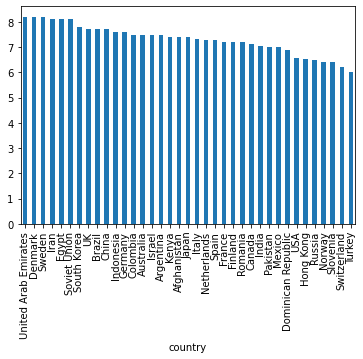

In [21]:
dataframe['budget'] = dataframe['budget'].astype(float)
dataframe['imdb_score'] = dataframe['imdb_score'].astype(float)

non_english_movies = dataframe.loc[(dataframe.language != 'English') & (dataframe.budget < 10000000.0)]
country_scores = non_english_movies.groupby('country').imdb_score.mean()
country_scores.sort_values(ascending=False).plot.bar()

In [22]:
dataframe['genres_num'] = dataframe.genres.apply(lambda x: len(x.split('|')))


In [23]:
dataframe['genres_num'].max()


8

In [24]:
dataframe['Type_of_genres'] = dataframe.genres.apply(lambda x: x.replace('|',','))
dataframe.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_num,Type_of_genres
0,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009,936,7.9,1.78,33000,4,"Action,Adventure,Fantasy,Sci-Fi"
1,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007,5000,7.1,2.35,0,3,"Action,Adventure,Fantasy"


In [25]:
dataframe['genres_first'] = dataframe.genres.apply(lambda x: x.split('|')[0] if '|' in x else x)
dataframe.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_num,Type_of_genres,genres_first
0,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,PG-13,237000000.0,2009,936,7.9,1.78,33000,4,"Action,Adventure,Fantasy,Sci-Fi",Action
1,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,Johnny Depp,...,PG-13,300000000.0,2007,5000,7.1,2.35,0,3,"Action,Adventure,Fantasy",Action
2,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,Christoph Waltz,...,PG-13,245000000.0,2015,393,6.8,2.35,85000,3,"Action,Adventure,Thriller",Action
3,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,Tom Hardy,...,PG-13,250000000.0,2012,23000,8.5,2.35,164000,2,"Action,Thriller",Action
4,Doug Walker,1,90,131,1000,Rob Walker,131,144512310,Documentary,Doug Walker,...,R,20000000.0,2009,12,7.1,2.35,0,1,Documentary,Documentary


<AxesSubplot:xlabel='imdb_score', ylabel='genres_first'>

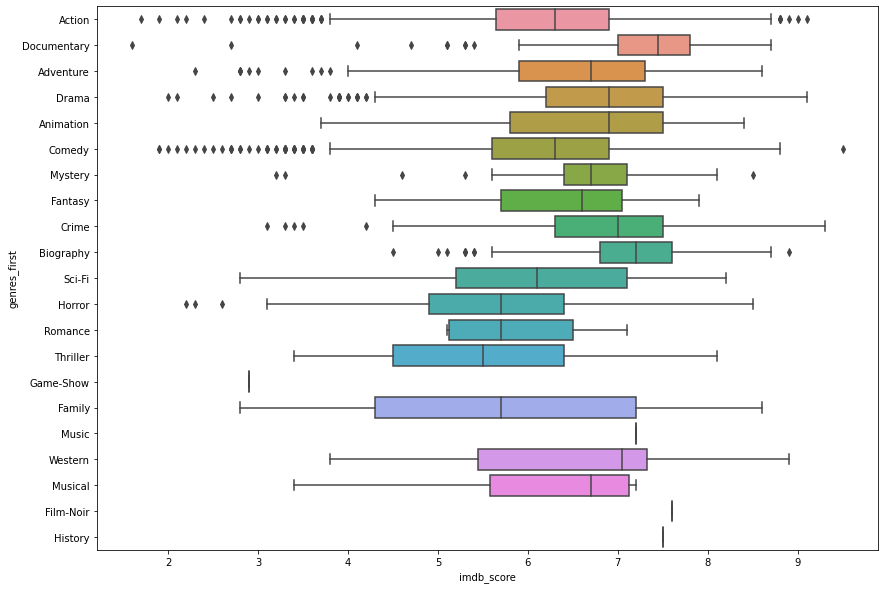

In [26]:
plt.figure(figsize=(14,10))
sns.boxplot(x='imdb_score',y='genres_first',data=dataframe)

<AxesSubplot:>

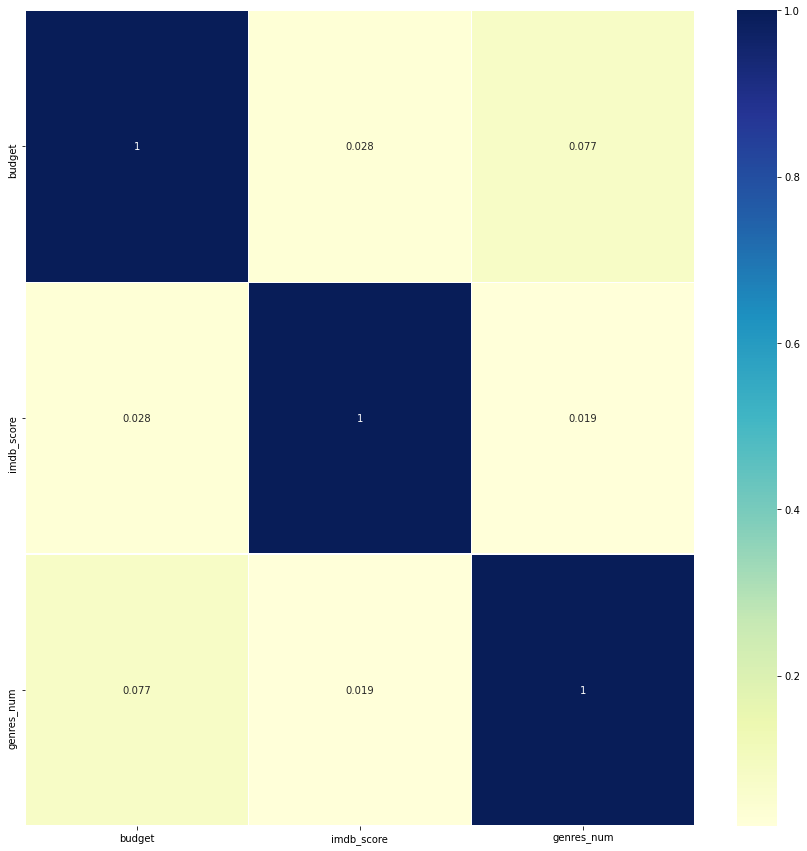

In [27]:
correlations = dataframe.corr()
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", linewidths=.5)

In [28]:
higest_impact = dataframe[['num_critic_for_reviews','duration','director_facebook_likes','num_voted_users','num_user_for_reviews']]

In [29]:
pd.pivot_table(dataframe,index='genres_first', values='imdb_score').sort_values('imdb_score', ascending = False)

,imdb_score
genres_first,
Film-Noir,7.600000
History,7.500000
Music,7.200000
Documentary,7.167857
Biography,7.158964
Crime,6.903746
Drama,6.765208
Animation,6.631148
Western,6.583333


<AxesSubplot:>

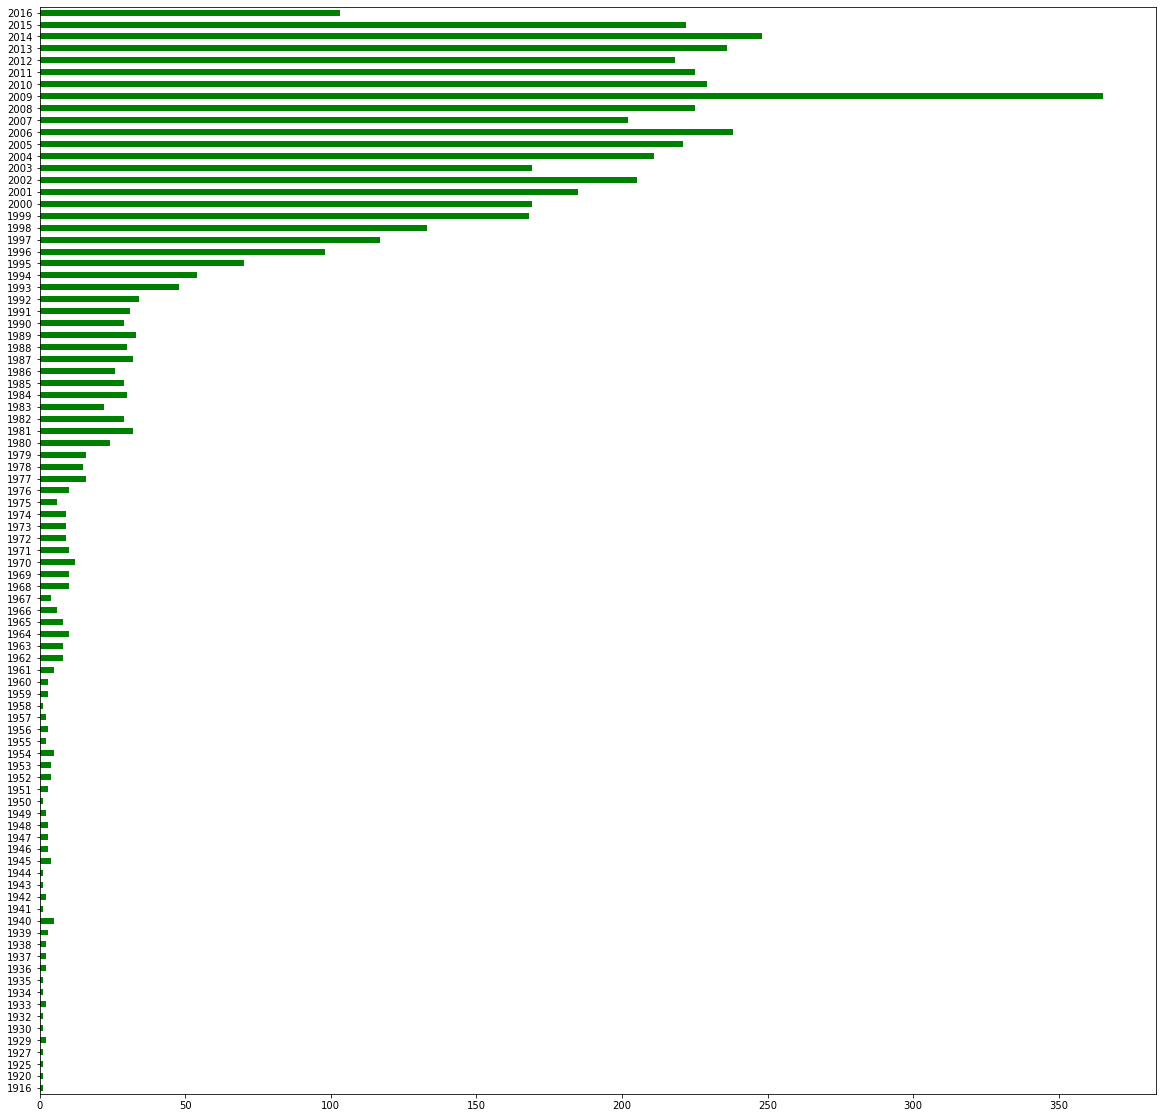

In [30]:
dataframe.title_year.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(20,20),color='g')

<AxesSubplot:>

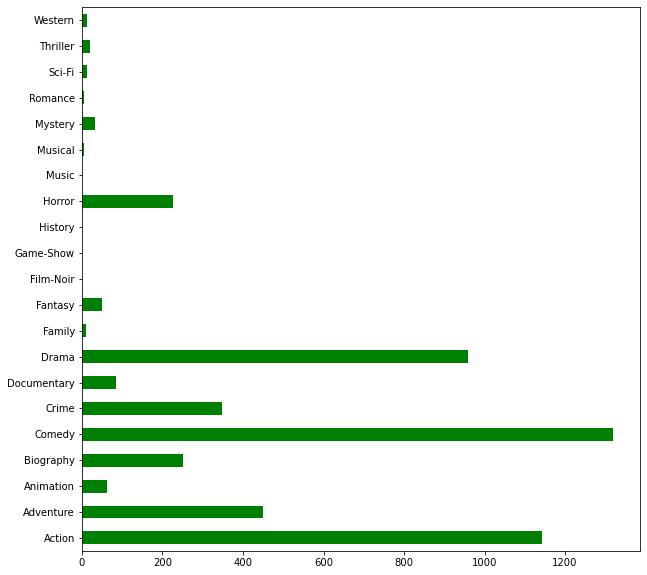

In [31]:
dataframe.genres_first.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(10,10),color='g')

<AxesSubplot:>

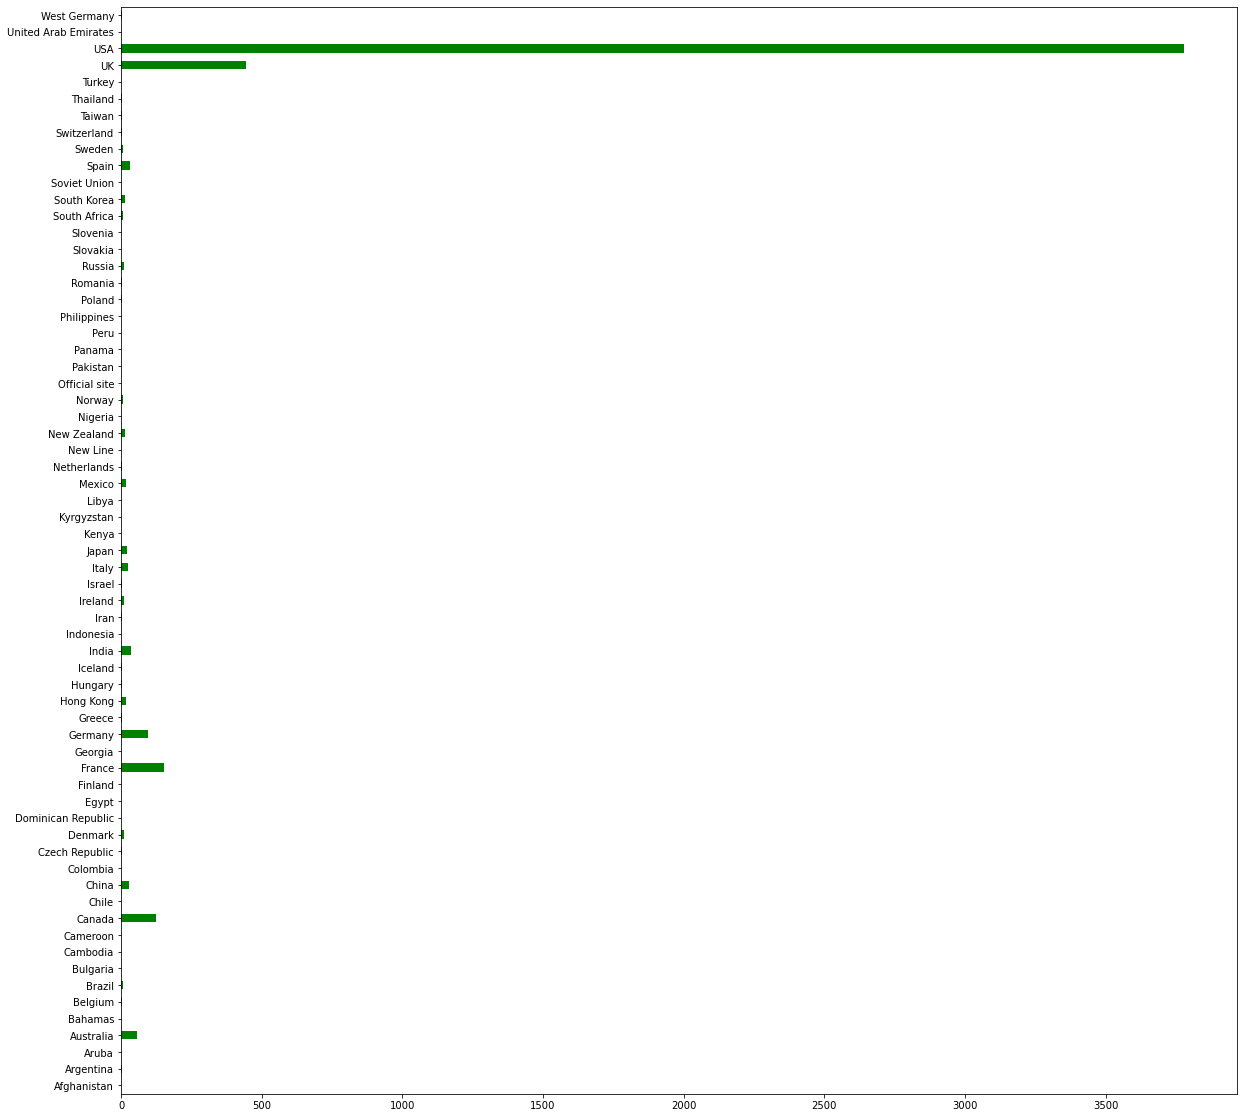

In [32]:
dataframe.country.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(20,20),color='g')

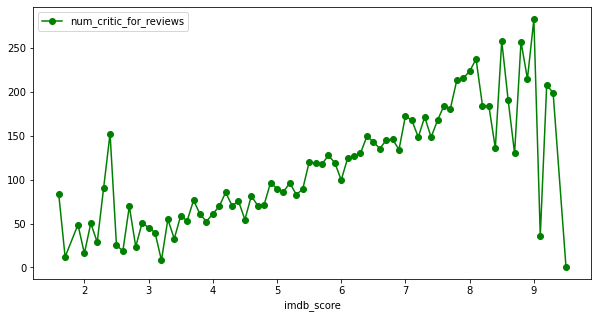

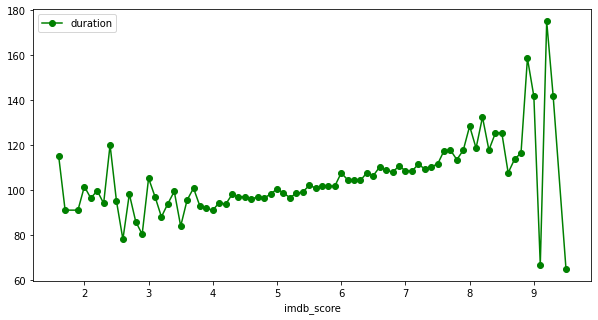

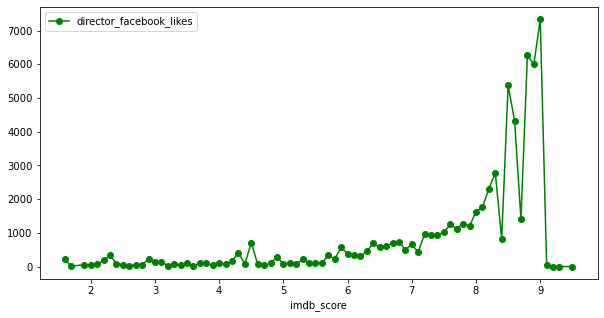

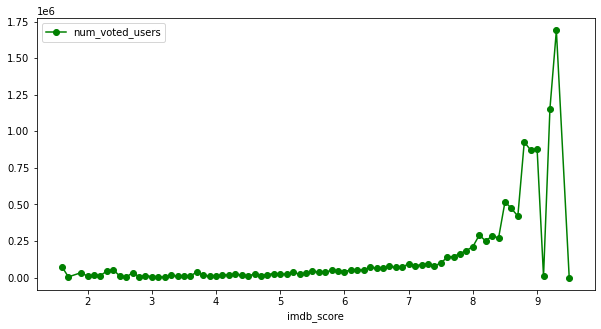

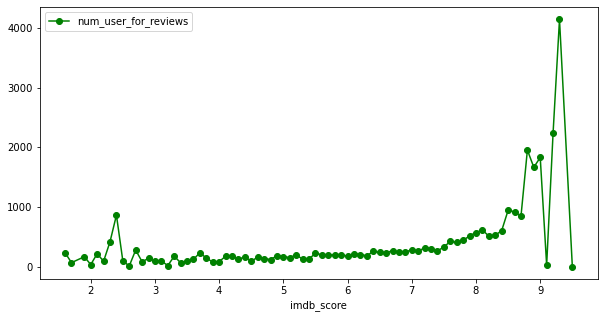

In [33]:
for i in higest_impact.columns:
    dataframe[i] = dataframe[i].astype(float)
    axis = dataframe.groupby('imdb_score')[[i]].mean().plot(figsize=(10,5),marker='o',color='g') 

In [34]:
dataframe.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_num,Type_of_genres,genres_first
0,James Cameron,723.0,178.0,0.0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,PG-13,237000000.0,2009,936,7.9,1.78,33000,4,"Action,Adventure,Fantasy,Sci-Fi",Action
1,Gore Verbinski,302.0,169.0,563.0,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,Johnny Depp,...,PG-13,300000000.0,2007,5000,7.1,2.35,0,3,"Action,Adventure,Fantasy",Action
2,Sam Mendes,602.0,148.0,0.0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,Christoph Waltz,...,PG-13,245000000.0,2015,393,6.8,2.35,85000,3,"Action,Adventure,Thriller",Action
3,Christopher Nolan,813.0,164.0,22000.0,23000,Christian Bale,27000,448130642,Action|Thriller,Tom Hardy,...,PG-13,250000000.0,2012,23000,8.5,2.35,164000,2,"Action,Thriller",Action
4,Doug Walker,1.0,90.0,131.0,1000,Rob Walker,131,144512310,Documentary,Doug Walker,...,R,20000000.0,2009,12,7.1,2.35,0,1,Documentary,Documentary


In [35]:
#Value counts for the countries 

value_counts=dataframe["country"].value_counts()
print(value_counts)

USA         3778
UK           443
France       154
Canada       124
Germany       96
            ... 
Chile          1
Cambodia       1
Georgia        1
Kenya          1
Bahamas        1
Name: country, Length: 65, dtype: int64


In [36]:
##get top 2 values of index
vals = value_counts[:2].index
print (vals)
dataframe['country'] = dataframe.country.where(dataframe.country.isin(vals), 'other')

Index(['USA', 'UK'], dtype='object')


In [37]:
#Successfully divided the country into three catogories 
dataframe["country"].value_counts()

USA      3778
other     777
UK        443
Name: country, dtype: int64

In [38]:
dataframe.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_num,Type_of_genres,genres_first
0,James Cameron,723.0,178.0,0.0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,PG-13,237000000.0,2009,936,7.9,1.78,33000,4,"Action,Adventure,Fantasy,Sci-Fi",Action
1,Gore Verbinski,302.0,169.0,563.0,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,Johnny Depp,...,PG-13,300000000.0,2007,5000,7.1,2.35,0,3,"Action,Adventure,Fantasy",Action
2,Sam Mendes,602.0,148.0,0.0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,Christoph Waltz,...,PG-13,245000000.0,2015,393,6.8,2.35,85000,3,"Action,Adventure,Thriller",Action
3,Christopher Nolan,813.0,164.0,22000.0,23000,Christian Bale,27000,448130642,Action|Thriller,Tom Hardy,...,PG-13,250000000.0,2012,23000,8.5,2.35,164000,2,"Action,Thriller",Action
4,Doug Walker,1.0,90.0,131.0,1000,Rob Walker,131,144512310,Documentary,Doug Walker,...,R,20000000.0,2009,12,7.1,2.35,0,1,Documentary,Documentary


In [39]:
#Removing the director name column

dataframe.drop('director_name', axis=1, inplace=True)

In [40]:
#Removing the actor1 ,actor 2 and actor 3 names 

dataframe.drop('actor_1_name',axis=1,inplace=True)
dataframe.drop('actor_2_name',axis=1,inplace=True)
dataframe.drop('actor_3_name',axis=1,inplace=True)

In [41]:
#Dropping the movie title 

dataframe.drop('movie_title',axis=1,inplace=True)

In [42]:
#Value count of genres

dataframe['genres'].value_counts()

Drama                                         235
Comedy                                        205
Comedy|Drama                                  189
Comedy|Drama|Romance                          187
Comedy|Romance                                158
                                             ... 
Adventure|Drama|Horror|Thriller                 1
Action|Crime|Drama|Mystery|Sci-Fi|Thriller      1
Comedy|Mystery|Sci-Fi|Thriller                  1
Drama|Horror|Romance                            1
Adventure|Animation|Drama|Family|Musical        1
Name: genres, Length: 914, dtype: int64

In [43]:
#Most of the values are equally distributed in genres column ,so we can remove the genres column

dataframe.drop('genres',axis=1,inplace =True)

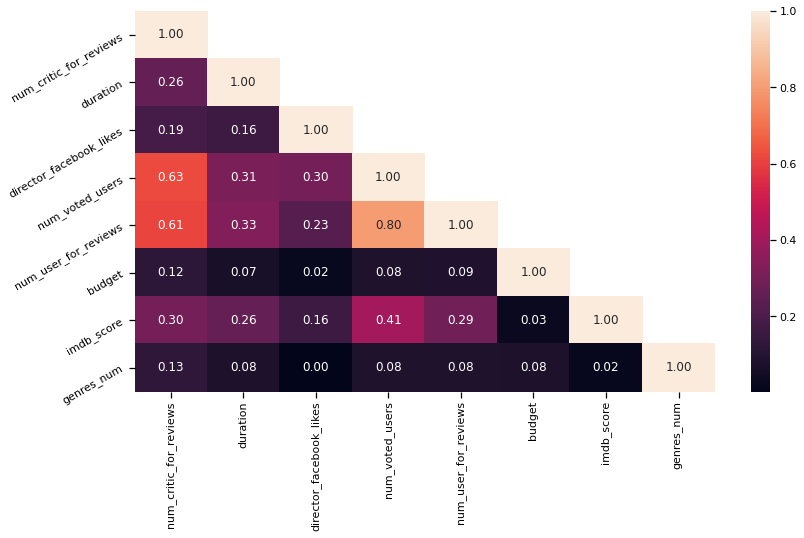

In [44]:
# Correlation with heat map
corr = dataframe.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [45]:
#Adding the facebook likes of actor 2 and actor 3 together 
dataframe['Other_actor_facebbok_likes']=dataframe["actor_2_facebook_likes"] + dataframe['actor_3_facebook_likes']

In [46]:
#Dropping the actor 2 and actor 3 facebook likes columns as they have been added together 

dataframe.drop('actor_2_facebook_likes',axis=1,inplace=True)
dataframe.drop('actor_3_facebook_likes',axis=1,inplace=True)
dataframe.drop('cast_total_facebook_likes',axis=1,inplace=True)

In [47]:
#Ratio of the ratio of num_user_for_reviews and num_critic_for_reviews.

dataframe['critic_review_ratio']=dataframe['num_critic_for_reviews']/dataframe['num_user_for_reviews']

In [48]:
#Dropping the num_critic_for_review

dataframe.drop('num_critic_for_reviews',axis=1,inplace=True)
dataframe.drop('num_user_for_reviews',axis=1,inplace=True)

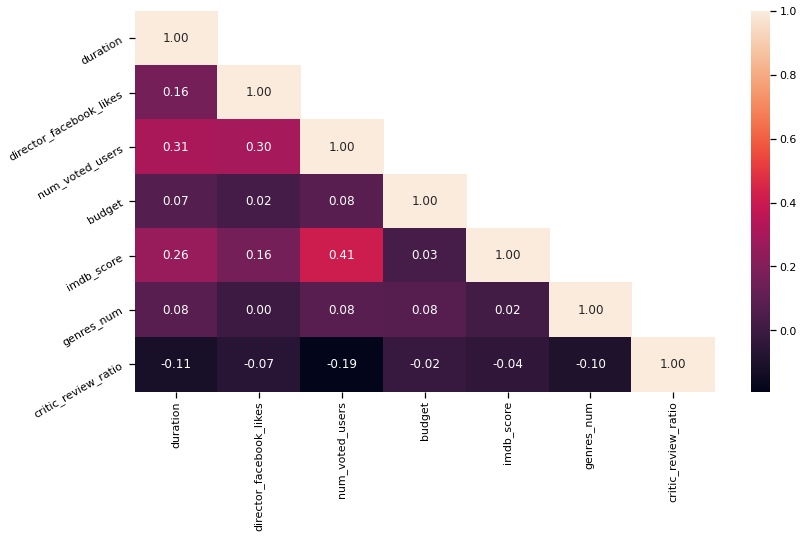

In [49]:
# New Correlation matrix shown in the figure 
corr = dataframe.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [50]:
# We need to categorize the imdb values in the range of 0-4,4-6,6-8 and 8-10 to mark them as the bad,average,good and excellent movies respectively

dataframe["imdb_binned_score"]=pd.cut(dataframe['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [51]:
#Dropping the imdb_score column as it is being replaced with the imdb_binned_score values 
dataframe.drop('imdb_score',axis=1,inplace=True)

In [52]:
dataframe.head(5)

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,language,country,content_rating,budget,title_year,aspect_ratio,movie_facebook_likes,genres_num,Type_of_genres,genres_first,Other_actor_facebbok_likes,critic_review_ratio,imdb_binned_score
0,178.0,0.0,1000,760505847,886204.0,English,USA,PG-13,237000000.0,2009,1.78,33000,4,"Action,Adventure,Fantasy,Sci-Fi",Action,936855,0.236739,3
1,169.0,563.0,40000,309404152,471220.0,English,USA,PG-13,300000000.0,2007,2.35,0,3,"Action,Adventure,Fantasy",Action,50001000,0.243942,3
2,148.0,0.0,11000,200074175,275868.0,English,UK,PG-13,245000000.0,2015,2.35,85000,3,"Action,Adventure,Thriller",Action,393161,0.605634,3
3,164.0,22000.0,27000,448130642,1144337.0,English,USA,PG-13,250000000.0,2012,2.35,164000,2,"Action,Thriller",Action,2300023000,0.301000,4
4,90.0,131.0,131,144512310,8.0,English,USA,R,20000000.0,2009,2.35,0,1,Documentary,Documentary,121000,1.000000,3


In [53]:
dataframe = pd.get_dummies(data = dataframe, columns = ['country'] , prefix = ['country'] , drop_first = True)
dataframe = pd.get_dummies(data = dataframe, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)

In [54]:
dataframe.columns

Index(['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'num_voted_users', 'language', 'budget', 'title_year',
       'aspect_ratio', 'movie_facebook_likes', 'genres_num', 'Type_of_genres',
       'genres_first', 'Other_actor_facebbok_likes', 'critic_review_ratio',
       'imdb_binned_score', 'country_USA', 'country_other', 'content_rating_G',
       'content_rating_GP', 'content_rating_M', 'content_rating_NC-17',
       'content_rating_Not Rated', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_Passed', 'content_rating_R', 'content_rating_TV-14',
       'content_rating_TV-G', 'content_rating_TV-MA', 'content_rating_TV-PG',
       'content_rating_TV-Y', 'content_rating_TV-Y7', 'content_rating_Unrated',
       'content_rating_X'],
      dtype='object')

In [55]:
X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes','gross','num_voted_users',
                        'budget','title_year','aspect_ratio','movie_facebook_likes',
                        'Other_actor_facebbok_likes','critic_review_ratio','country_USA','country_other',
                        'content_rating_G','content_rating_GP','content_rating_M','content_rating_NC-17',
                        'content_rating_Not Rated','content_rating_PG','content_rating_PG-13','content_rating_Passed',
                        'content_rating_R','content_rating_TV-14','content_rating_TV-G','content_rating_TV-PG',
                        'content_rating_Unrated','content_rating_X'],data=dataframe)
y=pd.DataFrame(columns=['imdb_binned_score'],data=dataframe)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)


In [56]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Check for missing values in X_train
if X_train.isnull().any().any():
    # Handle missing values in X_train (e.g., replace with mean, median, etc.)
    X_train.fillna(X_train.mean(), inplace=True)

# Check for missing values in X_test
if X_test.isnull().any().any():
    # Handle missing values in X_test (e.g., replace with mean, median, etc.)
    X_test.fillna(X_test.mean(), inplace=True)

# Scale the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [57]:
import numpy as np

# Check for missing values in X_train
missing_values_train = np.isnan(X_train)
missing_columns_train = np.any(missing_values_train, axis=0)

# Check for missing values in X_test
missing_values_test = np.isnan(X_test)
missing_columns_test = np.any(missing_values_test, axis=0)

# Print the columns with missing values in X_train
print("Missing values in X_train:")
print(X.columns[missing_columns_train])

# Print the columns with missing values in X_test
print("Missing values in X_test:")
print(X.columns[missing_columns_test])


Missing values in X_train:
Index([], dtype='object')
Missing values in X_test:
Index([], dtype='object')


In [58]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
logit = LogisticRegression(max_iter=1000)  # Increase max_iter
logit.fit(X_train, np.ravel(y_train, order='C'))
y_pred = logit.predict(X_test)

In [59]:
#Confusion matrix for logistic regression**

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[  0  28  28   0]
 [  0 158 252   1]
 [  0 125 834   6]
 [  0   4  39  25]]
Accuracy: 0.678


In [60]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, np.ravel(y_train,order='C'))
knnpred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, knnpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, knnpred))

[[  0  27  29   0]
 [  0 207 204   0]
 [  0 163 800   2]
 [  0   1  56  11]]
Accuracy: 0.6786666666666666


In [61]:
#SVC
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, np.ravel(y_train,order='C'))
svcpred = svc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, svcpred))

[[  1  26  29   0]
 [  2 173 236   0]
 [  9 195 733  28]
 [  0  10  40  18]]
Accuracy: 0.6166666666666667


In [62]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, np.ravel(y_train,order='C'))
rfcpred = rfc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))

[[  1  28  27   0]
 [  0 192 219   0]
 [  0  69 893   3]
 [  0   1  45  22]]
Accuracy: 0.7386666666666667


In [63]:
from sklearn.metrics import classification_report

print('Logistic Reports\n', classification_report(y_test, y_pred, zero_division=1))
print('KNN Reports\n', classification_report(y_test, knnpred, zero_division=1))
print('SVC Reports\n', classification_report(y_test, svcpred, zero_division=1))
print('Random Forests Reports\n', classification_report(y_test, rfcpred, zero_division=1))

Logistic Reports
               precision    recall  f1-score   support

           1       1.00      0.00      0.00        56
           2       0.50      0.38      0.44       411
           3       0.72      0.86      0.79       965
           4       0.78      0.37      0.50        68

    accuracy                           0.68      1500
   macro avg       0.75      0.40      0.43      1500
weighted avg       0.68      0.68      0.65      1500

KNN Reports
               precision    recall  f1-score   support

           1       1.00      0.00      0.00        56
           2       0.52      0.50      0.51       411
           3       0.73      0.83      0.78       965
           4       0.85      0.16      0.27        68

    accuracy                           0.68      1500
   macro avg       0.78      0.37      0.39      1500
weighted avg       0.69      0.68      0.65      1500

SVC Reports
               precision    recall  f1-score   support

           1       0.08      0.